# Replicar el curso Platzi, análisis exploratorio de datos, conociendo datos de pingüinos

## Instalar lirbrerías necesarias

In [ ]:
# crear ambiente para analisis de datos
!conda create -n data_analisis

# activar ambiente creado
!conda activate data_analisis

# instalar librerias con pip
!pip install palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels sklearn pyjanitor

## Importar librerías

In [3]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss


## Establecer apariencia general de los gráficos

In [67]:
%matplotlib inline
sns.set_style(style ='whitegrid')
sns.set_context(context= 'notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete palmerpenguis

#### Datos crudos

In [5]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.head()


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### Datos previamente procesados

In [6]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Colecta y validación de datos

### ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [8]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
preprocess_penguins_df.shape

(344, 8)

### ¿Existen valores nulos explícitos en el conjunto de datos?

In [10]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### De tener observaciones con valores nulos, ¿Cuántas tenemos por cada variable?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

### ¿Cuál es la proporción de valores nulos por cada variable?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df.rename(columns={'variable': 'Variable', 'value':'Faltante'}),
                y='Variable',
                hue='Faltante',
                multiple='fill',
                aspect=2.0,
            )
        )
    )
)

### ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df        
            )
        )
    )
)

### ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [13]:
print('La matriz es de '+ str(preprocess_penguins_df.shape) + ' antes de eliminar los valores nulos')

processed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)

print('La matriz es de '+ str(processed_penguins_df.shape) + ' después de eliminar los valores nulos')
print('Se están eliminando: '+ str(preprocess_penguins_df.shape[0] - processed_penguins_df.shape[0]) +' filas o registros')

La matriz es de (344, 8) antes de eliminar los valores nulos
La matriz es de (333, 8) después de eliminar los valores nulos
Se están eliminando: 11 filas o registros


## Conteos y proporciones

### ¿Qué estadísticos describen el conjunto de datos?

#### Todas las variables

In [14]:
processed_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


#### Solo las numéricas

In [ ]:
processed_penguins_df.describe(include=[np.number])

#### Solo categóricas
En este caso se confía en que los datos tipo object son categorías, sin embargo es necesario validarlo previamente

In [ ]:
processed_penguins_df.describe(include=object)

#### Solo categóricas
Se puede fijar que las variables tipo object sean categóricas haciendo lo siguiente

In [ ]:
(
    processed_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

### ¿Cómo visualizar los conteos?

#### Pandas

In [ ]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

#### Seaborn

In [ ]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color
)

### ¿Cómo visualizar proporciones?

In [ ]:
(
    processed_penguins_df
    .assign(x='')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)

## Medidas de dispersión

### ¿Cuál es el valor máximo de las variables?


In [16]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

### ¿Cuál es el valor mínimo de las variables?

In [17]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### ¿Cuál es el rango de las variables?

In [18]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

### ¿Cuál es la desviación estándar de las variables?

In [20]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

### ¿Cuál es el rango intercuartílico?

In [23]:
processed_penguins_df.quantile(0.75, numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
Name: 0.5, dtype: float64

In [26]:
processed_penguins_df.quantile(0.75, numeric_only=True) - processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [31]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.5, 0.25], numeric_only=True)
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


### ¿Cómo puedo visualizar la distribución de una variable?

#### Histograma

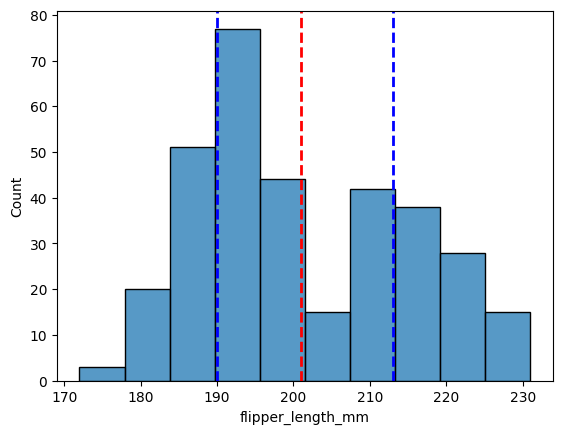

In [40]:
sns.histplot(
    data=processed_penguins_df,
    x = 'flipper_length_mm'
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color = 'red',
    linestyle='dashed',
    linewidth= 2
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color = 'blue',
    linestyle='dashed',
    linewidth= 2
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color = 'blue',
    linestyle='dashed',
    linewidth= 2
)

#### Diagrama de cajas / boxplot

<Axes: xlabel='flipper_length_mm'>

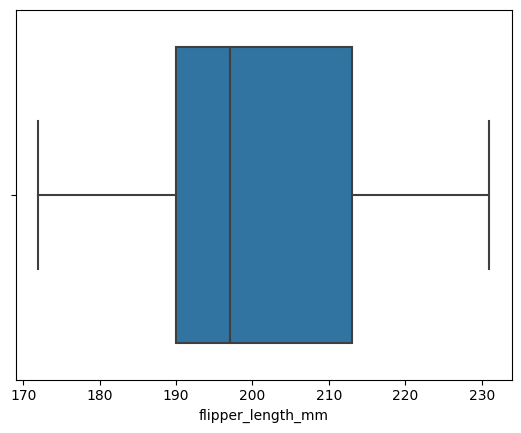

In [41]:
sns.boxplot(
    data= processed_penguins_df,
    x='flipper_length_mm'
)

## Distribuciones: PMFs, CDFs, PDFs

### Funciones de probabilidad de masas (PMFs)

#### Utlizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

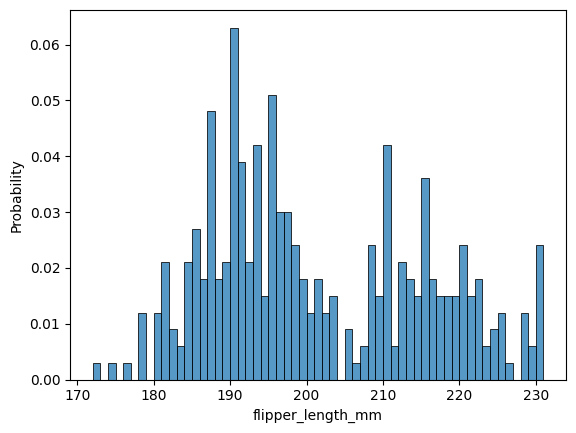

In [45]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

#### Utilizando empiricaldist

In [48]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    preprocess_penguins_df.flipper_length_mm,
    normalize = True
)

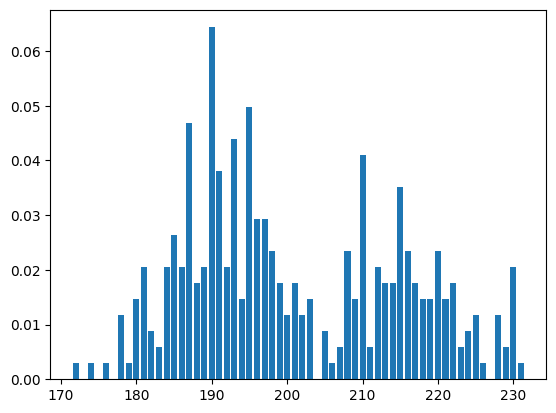

In [49]:
pmf_flipper_length_mm.bar()

In [51]:
# ¿cual es la probabilidad de que un pinguino tenga una longitud de ala de 190?
pmf_flipper_length_mm(190)

0.06432748538011696

### Funciones empíricas de probabilidad acumulada (ECDFs)

#### Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

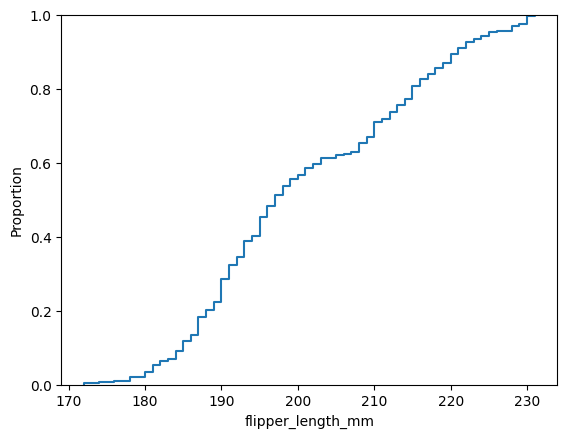

In [52]:
# ¿Cual es la probabilidad de tener un pinguino con longitud de ala de 170 o menos?
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

#### Utilizando empiricaldist

In [54]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

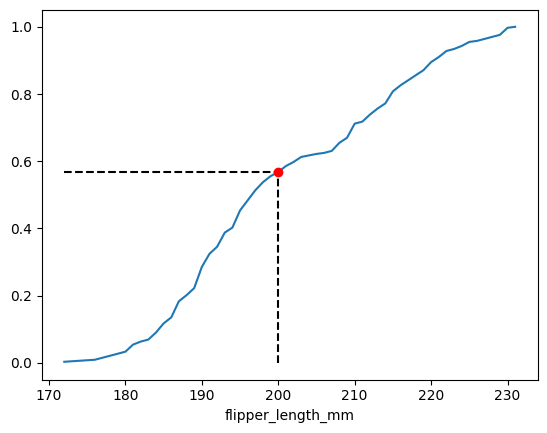

In [60]:
cdf_flipper_length_mm.plot()

# ¿Cual es la probabilidad de tener un pinguino con longitud de ala de 200 o menos?
q = 200
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x = q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y = p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

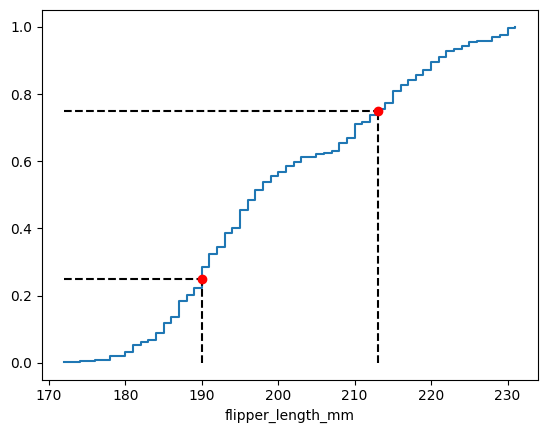

In [64]:
cdf_flipper_length_mm.step()
p_1 = 0.25 # probabilidad especifica
p_2 = 0.75

ps = (0.25, 0.75) #Rango Intercuartilico IQR
qs= cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x = qs,
    ymin=0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y = ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x = qs,
    y=ps,
    color='red',
    zorder=2
)

#### Comparando distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

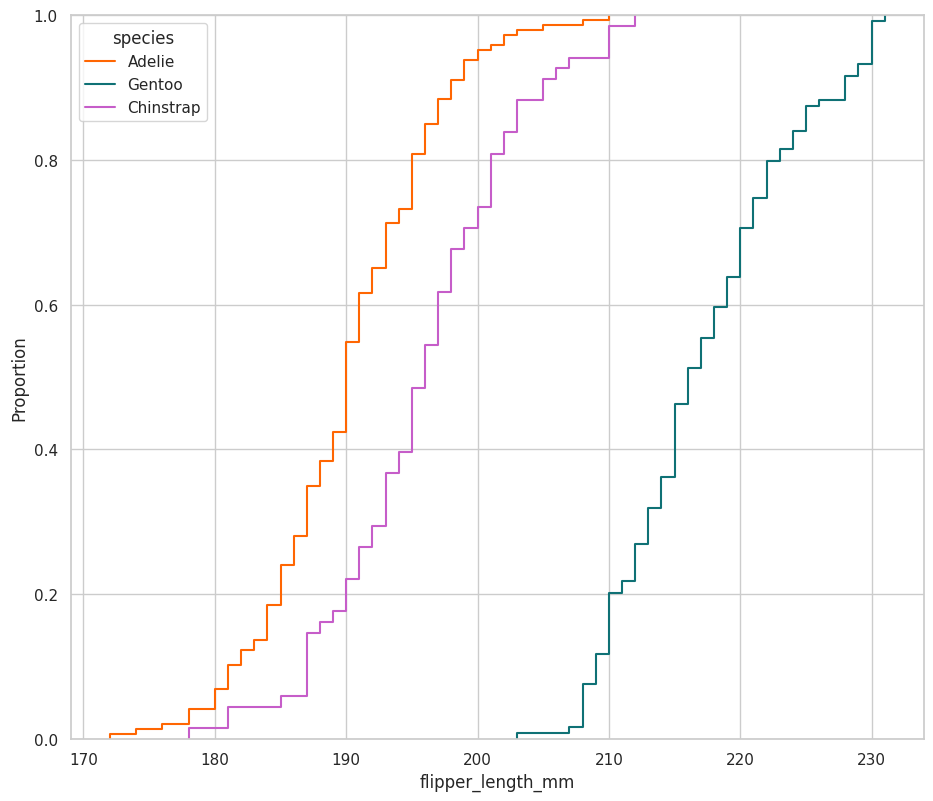

In [68]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

### Funciones de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

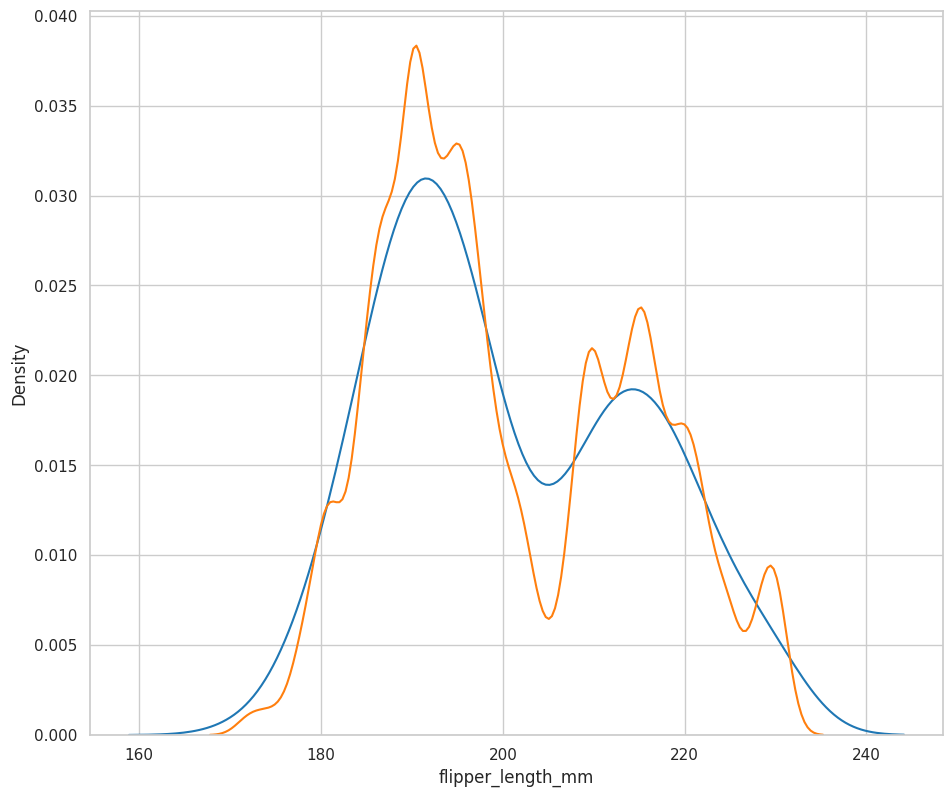

In [70]:
sns.kdeplot(
    data= preprocess_penguins_df,
    x = 'flipper_length_mm'
)

sns.kdeplot(
    data= preprocess_penguins_df,
    x = 'flipper_length_mm',
    bw_method=0.1
)

In [72]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g'>

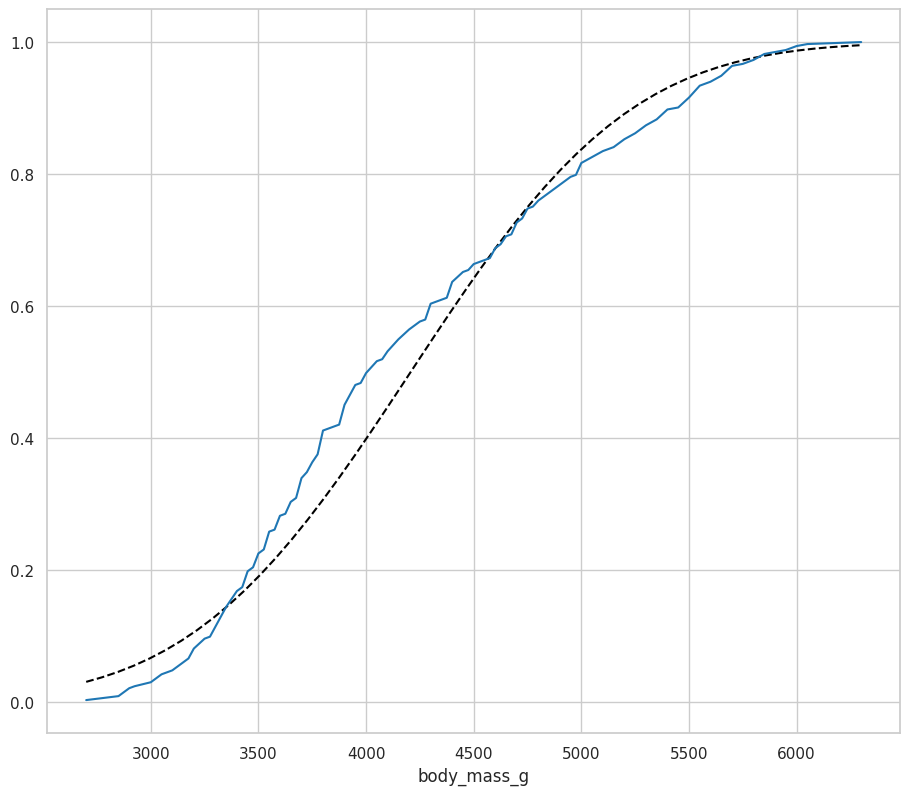

In [79]:
# ¿Mis datos siguen una distribucion normal?
xs = np.linspace(stats['min'], stats['max'] ) # vector x con valores minimo y maximo de mis datos
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs) # funcion de probabilidad acumulada si fuera una distribucion normal

plt.plot(xs, ys, color='black', linestyle='dashed') # grafica si mis datos siguen una distriucion normal

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot() # grafica de probabilidad acumulada de mis datos

<Axes: xlabel='body_mass_g', ylabel='Density'>

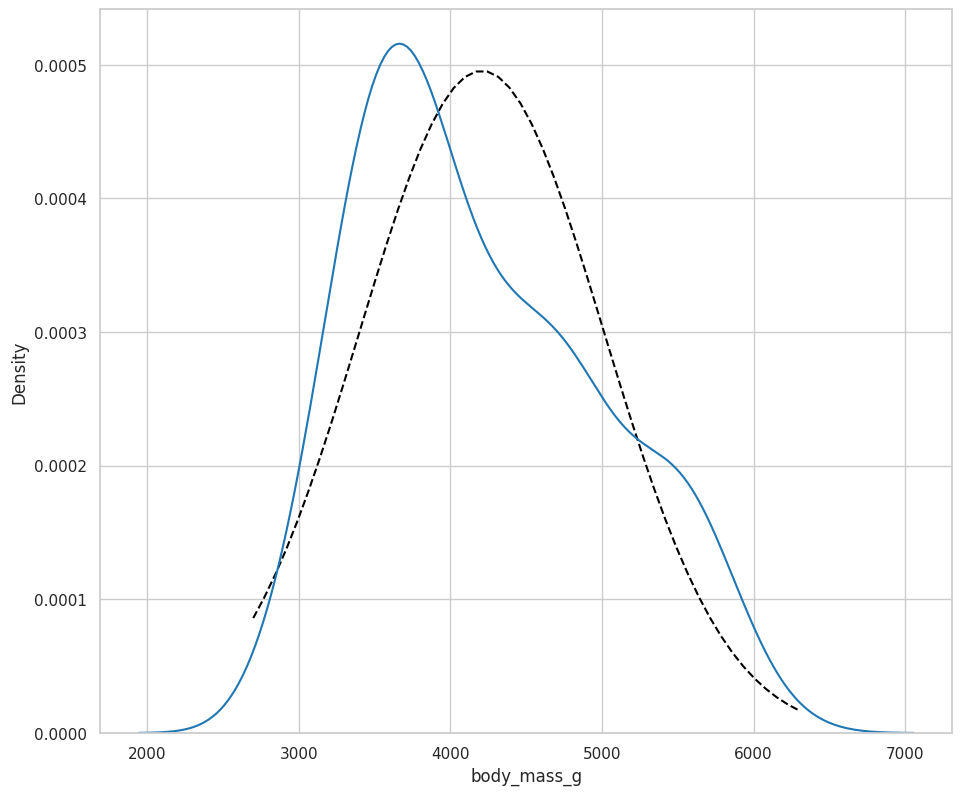

In [81]:
# ¿Mis datos siguen una distribucion normal?
xs = np.linspace(stats['min'], stats['max'] )
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs) #funcion de densidad de probabilidad si mis datos siguieran una distribucion normal

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data= processed_penguins_df,
    x = 'body_mass_g'
)

## Ley de los Grandes Números y Teorema del Límite Central

### Ley de los Grandes Números
A medida que el tamaño de la muestra aumenta la probabilidad se acerca a la probabildad teórica

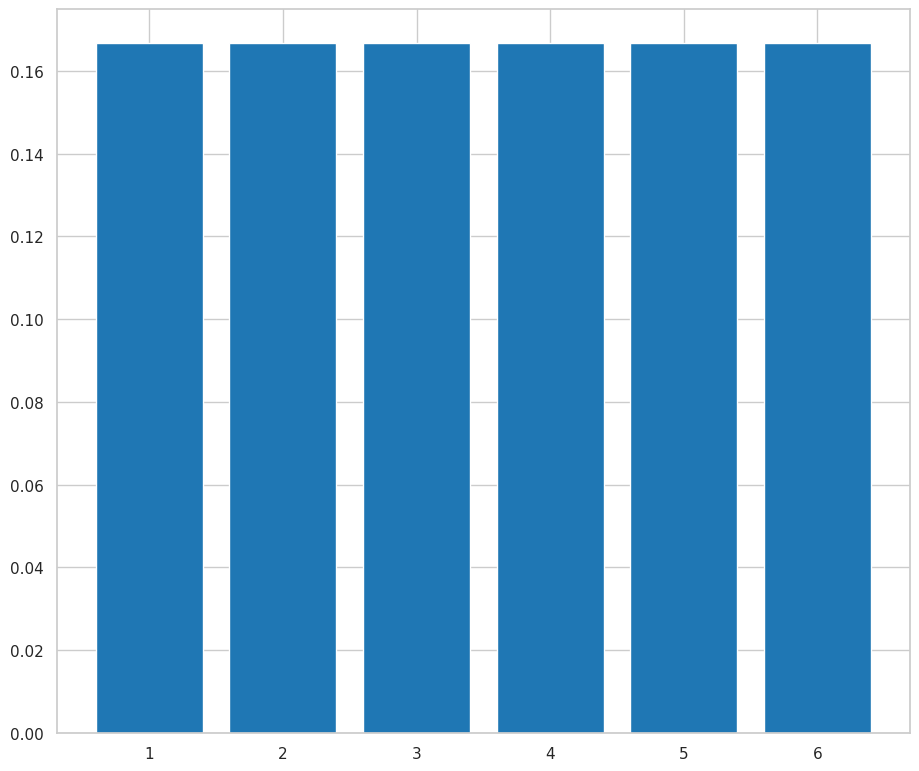

In [82]:
dado = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dado.bar()

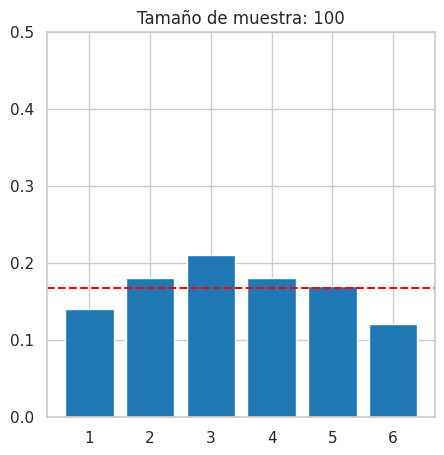

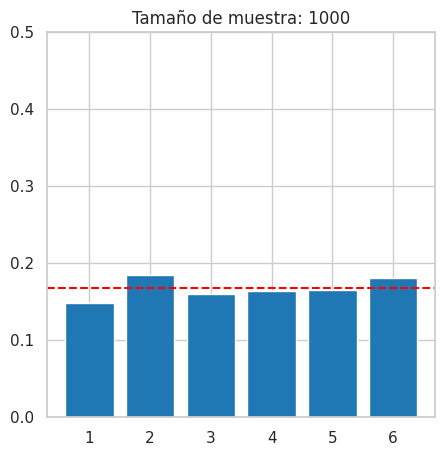

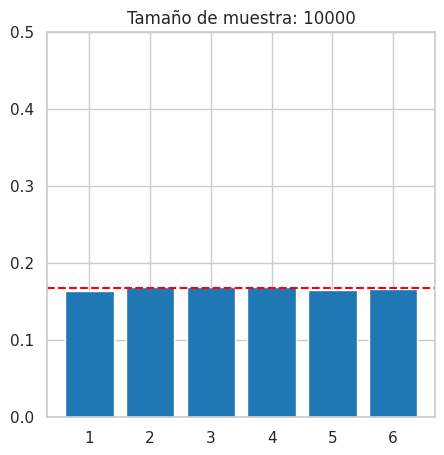

In [89]:
for tamano_muestra in (1e2, 1e3, 1e4):
    tamano_muestra = int(tamano_muestra)
    valores = dado.sample(tamano_muestra)
    muestra_pmf = empiricaldist.Pmf.from_seq(valores)
    
    plt.figure(figsize=(5,5))
    muestra_pmf.bar()
    plt.axhline(y= 1/6, color= 'red', linestyle='dashed')
    plt.ylim([0, 0.5])
    plt.title(f'Tamaño de muestra: {tamano_muestra}')
    

### Teorema del Límite Central


In [93]:
processed_penguins_df.sex.value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

In [94]:
sex_mumeric = processed_penguins_df.sex.replace(['male', 'female'], [1 , 0])

In [98]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()
    
np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_mumeric_sample = sex_mumeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f'sample {i}'
    samples_df[sample_name] = sex_mumeric_sample

male_population_mean = samples_df.mean().mean()
print(f'Porcentaje estimado de pinguino machos es: {male_population_mean *100: 4f}%')


/tmp/ipykernel_357/2051578662.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_mumeric_sample
/tmp/ipykernel_357/2051578662.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_mumeric_sample
/tmp/ipykernel_357/2051578662.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

Porcentaje estimado de pinguino machos es:  50.182857%


## Análisis bivariado: Estableciendo relaciones - Gráfica de puntos

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

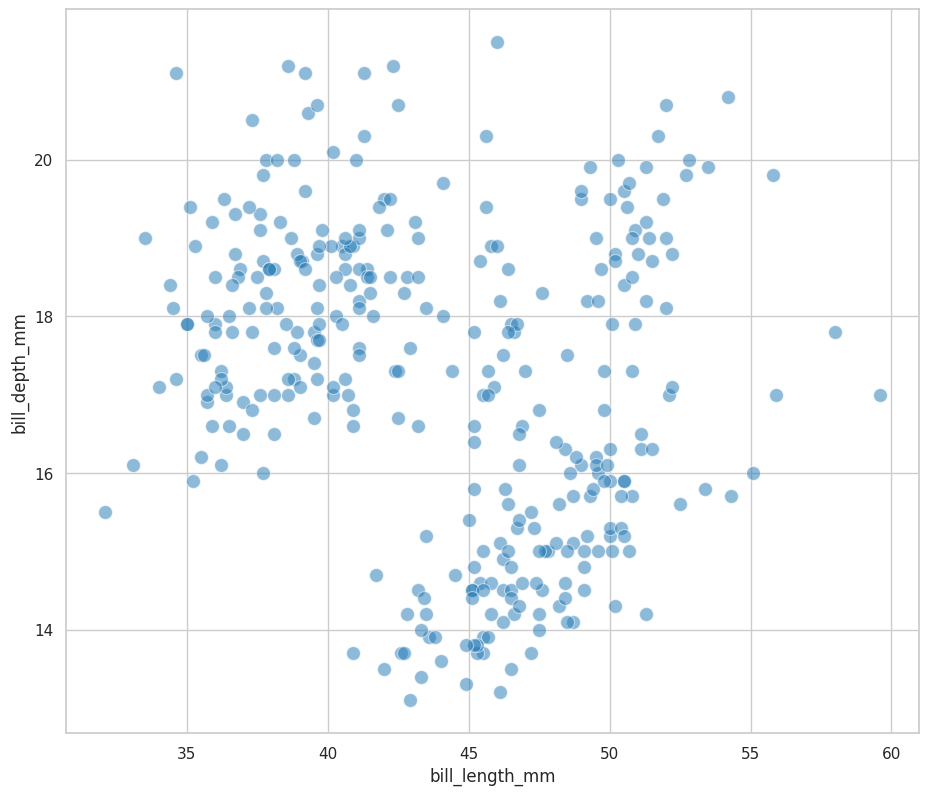

In [103]:
sns.scatterplot(
    data = processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100
)

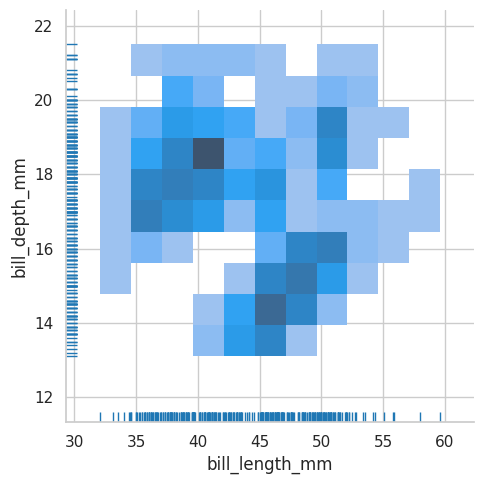

In [105]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

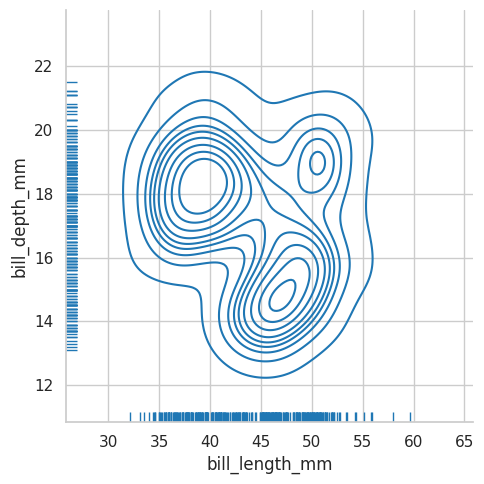

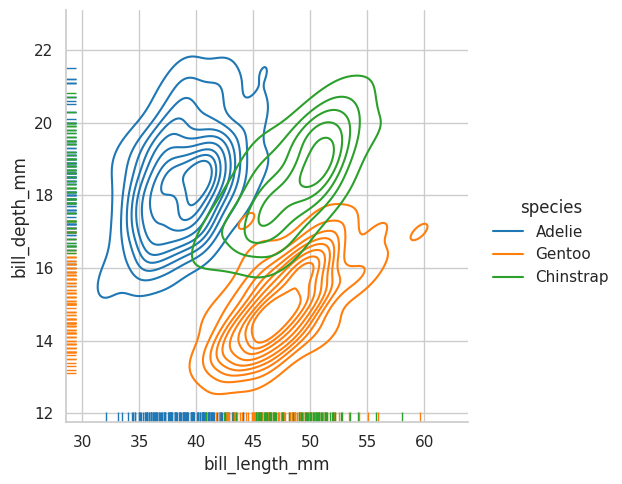

In [110]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde'
)

sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde',
    hue='species'
)

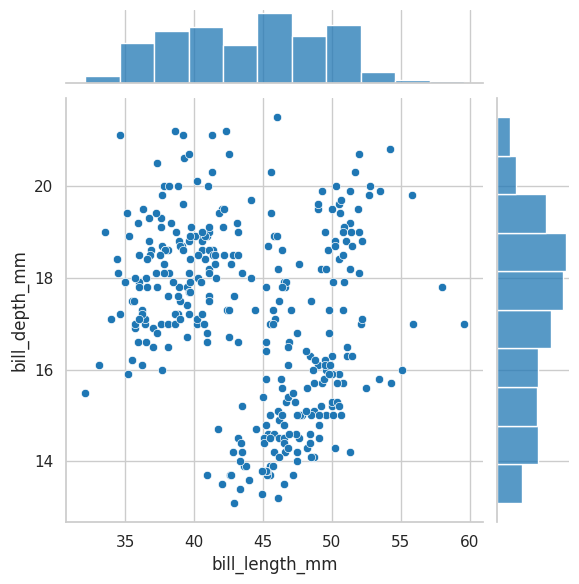

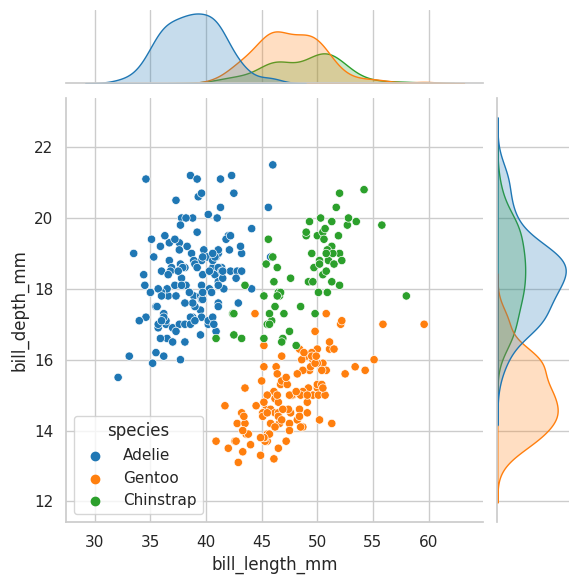

In [111]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

## Análisis bivariado: Estableciendo relaciones - Gráficos d violín y boxplots